In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Search Rank Algorithms
Implementing search ranking algos
- Discounted Cumulative Gain
- Normalized Cumulative Discounted Gain
- MAP: Mean Average precision

### DCG: Discounted Cumulative Gain
DCG = Eps_(i=1)^r[rel_i/(log_2(i + 1))

loss function for ranking strategy.  Takes into account the relevance score generated by a model and the rank positioning of the target.  The ordering of the results can be tested.

In [99]:
rel_binary = [1, 0 , 1, 0, 1]

#create list with arrays of #1 relevance values up to rank i (numerator) and #2 log of i+1 
DCG_components = [np.concatenate([[np.array(rel_binary[:i+1])], [np.log2(1+np.arange(i+1)+1)]]) for i in np.arange(len(rel_binary))]
print('DCG_components:')
DCG_components
# Divide at each ranking i
DCG_at_i = [np.sum(r[0]/r[1]) for r in DCG_components]
print(f'DCG_at_i: {DCG_at_i}')
i = len(rel_binary)
DCG = np.sum(DCG_at_i[:i])

def DCG_r(relevance_list, rank=-1):
    if rank == -1: rank = len(rel_binary)
    return np.sum( #sum over ranks
        [np.sum( #sum by specific rank
            np.array(relevance_list[:i+1]) / np.log2(1+np.arange(i+1)+1)) #relevance at i / log2(i+1)
            for i in np.arange(len(relevance_list))][:rank]) # 

DCG_r(rel_binary,1) 

DCG_components:


[array([[1.],
        [1.]]),
 array([[1.       , 0.       ],
        [1.       , 1.5849625]]),
 array([[1.       , 0.       , 1.       ],
        [1.       , 1.5849625, 2.       ]]),
 array([[1.        , 0.        , 1.        , 0.        ],
        [1.        , 1.5849625 , 2.        , 2.32192809]]),
 array([[1.        , 0.        , 1.        , 0.        , 1.        ],
        [1.        , 1.5849625 , 2.        , 2.32192809, 2.5849625 ]])]

DCG_at_i: [1.0, 1.0, 1.5, 1.5, 1.8868528072345416]


1.0

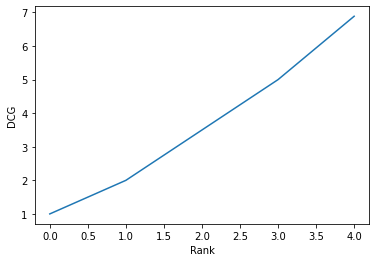

In [120]:
x = np.arange(len(rel_binary))
y = [DCG_r(rel_binary, x_i+1) for x_i in x]
plt.plot(x, y,)
plt.xlabel("Rank")
plt.ylabel("DCG")

plt.show();

In [27]:
np.array(rel_binary)[rel_sorted]

array([1, 1, 1, 0, 0])

## Normalized DCG


In [145]:
# Normalized DCG
# divide DCG by DCG of optimal order
rel_sorted = np.argsort(rel_binary)[::-1]
optimized_relevance = np.array(rel_binary)[rel_sorted]
optimized_relevance
optimal_DCG = DCG_r(optimized_relevance)
normalized_DCG = DCG_r(rel_binary)/DCG_r(optimized_relevance)

def NDCG_r(relevance_list, rank=-1):
    if rank == -1: rank = len(relevance_list)
    _relevance_list = relevance_list[:rank]
    rel_sorted = np.argsort(_relevance_list)[::-1]
    optimized_relevance = np.array(_relevance_list)[rel_sorted]
    optimal_DCG = DCG_r(optimized_relevance)
    return DCG_r(_relevance_list)/DCG_r(optimized_relevance)

NDCG_r(rel_binary,3)

array([1, 1, 1, 0, 0])

0.8212377705398237

In [133]:
rank = 3
np.argsort(rel_binary)[rank::-1]

array([2, 0, 3, 1])

In [144]:
rel_binary[:3]
DCG_r(rel_binary[:3])

[1, 0, 1]

3.5

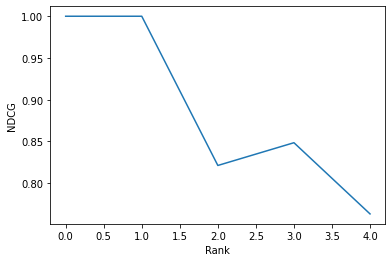

In [146]:
x = np.arange(len(rel_binary))
y = [NDCG_r(rel_binary, x_i+1) for x_i in x]
plt.plot(x, y,)
plt.xlabel("Rank")
plt.ylabel("NDCG")

plt.show();